***Portfolio Managment (self-Project)***

*Project Overview*:
    The goal of this project is to construct and optimize a portfolio of financial assets using Modern Portfolio Theory (MPT). The project will involve selecting a basket of assets, calculating their expected returns and risks, and then finding the optimal asset allocation that maximizes return for a given level of risk or minimizes risk for a given level of return.

*Objectives*:
Data Collection: Gather historical price data for a selected group of assets (e.g., stocks).
Return Calculation: Compute the daily, weekly, or monthly returns of the selected assets.
Risk Calculation: Calculate the covariance matrix of asset returns to assess the risk (volatility) of the portfolio.
Optimization: Apply portfolio optimization techniques to find the efficient frontier, the optimal asset allocation, and analyze different portfolios' risk-return profiles.
Backtesting: Evaluate the performance of the optimized portfolio using historical data and compare it with a benchmark index.
Visualization: Create visualizations to illustrate the efficient frontier, portfolio composition, and the performance of the optimized portfolio.


In [61]:
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
data = yf.download(tickers, start="2015-01-01", end="2023-01-01")['Adj Close']


[*********************100%%**********************]  5 of 5 completed


In [34]:
covariance_matrix = returns.cov()
mean_returns=returns.mean()


In [62]:
import numpy as np
from scipy.optimize import minimize

# Example data (replace with your actual data)
mean_returns = np.array([0.001005, 0.001061, 0.000765, 0.001037, 0.001696])
cov_matrix = np.array([
    [0.000356, 0.000231, 0.000215, 0.000237, 0.000289],
    [0.000231, 0.000440, 0.000248, 0.000248, 0.000301],
    [0.000215, 0.000248, 0.000319, 0.000238, 0.000245],
    [0.000237, 0.000248, 0.000238, 0.000314, 0.000268],
    [0.000289, 0.000301, 0.000245, 0.000268, 0.001277]
])

# Define portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

# Negative Sharpe Ratio function
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_returns, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_returns - risk_free_rate) / p_std

# Constraints
def constraint_sum(weights):
    return np.sum(weights) - 1

def constraint_minimum_allocation(weights):
    return weights[0] - 0.10  # Asset 1 (AAPL) must have at least 10%

def constraint_minimum_allocation_asset2(weights):
    return weights[1] - 0.05  # Asset 2 (AMZN) must have at least 5%

def constraint_minimum_low_risk_allocation(weights):
    # Example: Assets 3 (GOOG) and 4 (MSFT) are considered low-risk
    return 0.30 - (weights[2] + weights[3])

def constraint_maximum_allocation(weights):
    # Prevent any asset from having more than 50% allocation
    return 0.50 - np.max(weights)

def constraint_minimum_allocation_nonzero(weights):
    # Ensure that all assets receive a minimum allocation (e.g., 5%)
    return np.min(weights) - 0.05

# Number of assets
num_assets = len(mean_returns)

# Bounds: Each asset's weight between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

# Constraints: Sum to 1, minimum allocations, low-risk allocation, max allocation, and non-zero allocation
constraints = [
    {'type': 'eq', 'fun': constraint_sum},
    {'type': 'ineq', 'fun': constraint_minimum_allocation},
    {'type': 'ineq', 'fun': constraint_minimum_allocation_asset2},
    {'type': 'ineq', 'fun': constraint_minimum_low_risk_allocation},
    {'type': 'ineq', 'fun': constraint_maximum_allocation},
    {'type': 'ineq', 'fun': constraint_minimum_allocation_nonzero}
]

# Initial guess: Equal distribution
initial_guess = num_assets * [1. / num_assets]

# Perform optimization
result = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, 0.01),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x

print("Optimal Weights:", optimal_weights)
print("Expected Portfolio Return:", np.dot(optimal_weights, mean_returns))
print("Expected Portfolio Risk (Std Dev):", np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))))


Optimal Weights: [0.1        0.30000002 0.05       0.04999998 0.5       ]
Expected Portfolio Return: 0.0013569000004254777
Expected Portfolio Risk (Std Dev): 0.02330863579248632


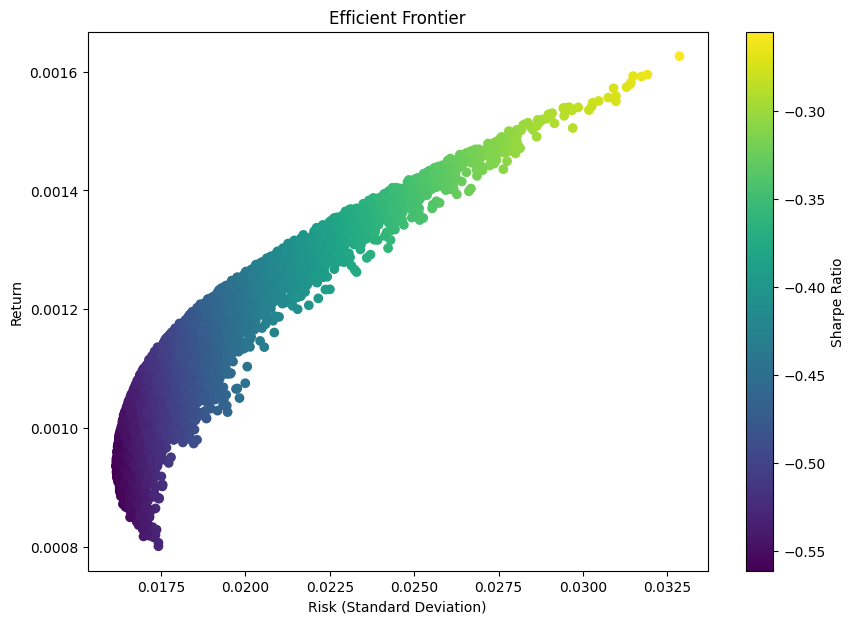

In [63]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(num_assets), 1)[0]
    p_return, p_std = portfolio_performance(weights, mean_returns, covariance_matrix)
    results[0,i] = p_std
    results[1,i] = p_return
    results[2,i] = (p_return - 0.01) / p_std  # Sharpe Ratio

portfolio_risks = results[0]
portfolio_returns = results[1]
sharpe_ratios = results[2]

# Plotting the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe_ratios, marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()